
📊 Sales Summary:
      product  total_qty  revenue
0  Headphones         15    750.0
1      Laptop          5   4000.0
2     Monitor          6   1200.0
3       Phone         10   5000.0
4      Tablet          7   2100.0


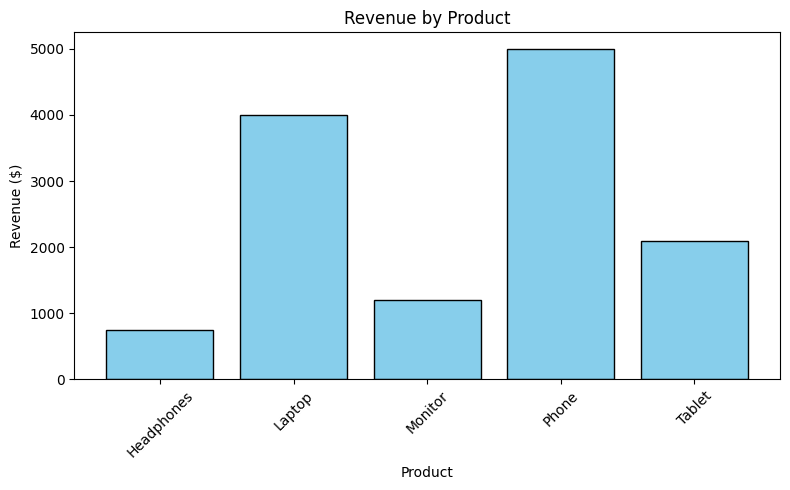

<Figure size 640x480 with 0 Axes>

In [1]:
# --------------------------------------------------
# Basic Sales Summary using SQLite + Python
# --------------------------------------------------

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Create a new SQLite database (or connect if exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2️⃣ Create a sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# 3️⃣ Insert some sample sales data
sample_data = [
    ("Laptop", 5, 800.0),
    ("Phone", 10, 500.0),
    ("Tablet", 7, 300.0),
    ("Headphones", 15, 50.0),
    ("Monitor", 6, 200.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# 4️⃣ Run SQL query to get total quantity and revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# 5️⃣ Display results
print("\n📊 Sales Summary:")
print(df)

# 6️⃣ Plot revenue by product
plt.figure(figsize=(8, 5))
plt.bar(df["product"], df["revenue"], color='skyblue', edgecolor='black')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7️⃣ (Optional) Save chart
plt.savefig("sales_chart.png")

# Close connection
conn.close()
